In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import time
import regex as re
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [2]:
url='https://www.bikewale.com/used/bikes-in-india/'
response=requests.get(url)
response.status_code

200

In [3]:
url = "https://www.bikewale.com/used/bikes-in-india/"
page = requests.get(url)
soup = BeautifulSoup(page.text)

In [ ]:

#code for scraping the data from all the pages of the site
k=[]

for i in range(1,30): 
    start_time = time.time()
    URL = 'https://www.bikewale.com/used/bikes-in-india/page-{}/'.format(i)
    headers={"user-agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/96.0.4664.110 Safari/537.36 Edg/96.0.1054.62"}
    page = requests.get(URL,headers=headers)
    pagecontent = page.text
    soup = BeautifulSoup(pagecontent)
    a=soup.find_all('div',attrs={"class":"model-details-content font14"})
    for i in a:
        
        if i is None:
            k.append("0")
        else:
            k.append(i.text)
    

In [ ]:
#creating the dataframe from the data scraped
k[0]
l=[]
for i in k:
    l.append(i.split('\n'))
    
df=pd.DataFrame(l)


In [ ]:
#cleaning te dataframe
post=[]
for i in df['Bikenames']:
    a=re.findall('[0-9]+\s[A-z]+\s[0-9]+',i)
    b=str(a).replace('[','').replace(']','').replace("'","")
    post.append(b)
    
df['uploaded_on']=post

km=[]
for i in df['kilometers']:
    a=re.findall('[0-9]+\,[0-9]+',i)
    b=str(a).replace('[','').replace(']','').replace("'","").replace(',','')
    km.append(b)
    
df['kilometers']=km

cost=[]
for i in df['price']:
    a=re.findall('[0-9]\,?[0-9]+\,[0-9]+',i)
    b=str(a).replace('[','').replace(']','').replace("'","").replace(',','')
    cost.append(b)
    
df['price']=cost

comp=[]
for i in df['Bikenames']:
    a=re.findall('[0-9]+\,\s([A-z]+)',i)
    b=str(a).replace('[','').replace(']','').replace("'","").replace(',','')
    comp.append(b)
    
df['company']=comp

model=[]
for i in df['model_year']:
    a=re.findall('[0-9]+',i)
    b=str(a).replace('[','').replace(']','').replace("'","")
    model.append(b)
    
df['model_year']=model


df=df[['company','Bikenames','model_year','kilometers','price','location','owner','uploaded_on']]


bike=[]
for i in df['Bikenames']:
    a=i.split('Updated')
    b=str(a).split(',')
    c=b[1]
    d=c.replace("'","")
    bike.append(d)
    
df['Bikenames']=bike
            
name=[]
for i in df['Bikenames']:
    a=i.split()[1:4]
    b=str(a).replace('[','').replace(']','').replace("'","").replace(',','')
    name.append(b)
    
df['Bikenames']=name

df.to_csv(r'C:\Users\Ujwal Kumar\Documents\project\usedbikes.csv')

df=pd.read_csv(r'C:\Users\Ujwal Kumar\Documents\project\usedbikes.csv')

df.info()


In [ ]:
#cheacking whether there are null values in the datafram or not
df.isnull().sum()

In [ ]:
#filling the null values
z=df['kilometers'].mean()
df['kilometers'].fillna(value = z,
          inplace = True)
df['uploaded_on'].fillna(value = 2021-5-17,
          inplace = True)   

In [ ]:
#converting the type of columns to our requirements
df['kilometers']=df['kilometers'].astype('int')
df['price']=df['price'].astype('int')
df['model_year']=df['model_year'].astype('int')            
df['uploaded_on']=pd.to_datetime(df['uploaded_on'], dayfirst=True,
errors='coerce')

In [ ]:
#saving the file to .csv format
df.to_csv(r'C:\Users\Ujwal Kumar\Documents\project\final.csv')

In [4]:
df=pd.read_csv("C:\\Users\\asus\\Documents\\data analysis\\project web scraping\\final.csv")

In [5]:
df.head()

,company,Bikenames,model_year,kilometers,price,location,Owner,uploaded_on
0,Bajaj,Avenger Cruise 220,2017,2250,85000,Bangalore,1st,1/7/2022
1,Bajaj,Pulsar 150 Kick,2016,37729,50000,Mangalore,1st,1/7/2022
2,Suzuki,Intruder 150 SP,2019,4102,62000,Delhi,1st,1/7/2022
3,Yamaha,FZ16 Standard,2010,45000,20000,Bilaspur,1st,1/7/2022
4,Bajaj,Discover 125 ST,2012,70990,31000,Bapatla,2nd,1/7/2022


In [6]:
df['uploaded_on'] = pd.to_datetime(df['uploaded_on'])

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 580 entries, 0 to 579
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   company      580 non-null    object        
 1   Bikenames    580 non-null    object        
 2   model_year   580 non-null    int64         
 3   kilometers   580 non-null    int64         
 4   price        580 non-null    int64         
 5   location     580 non-null    object        
 6   Owner        580 non-null    object        
 7   uploaded_on  579 non-null    datetime64[ns]
dtypes: datetime64[ns](1), int64(3), object(4)
memory usage: 36.4+ KB


In [8]:
df.describe()

,model_year,kilometers,price
count,580.000000,580.000000,580.000000
mean,2015.201724,28107.922414,75738.870690
std,4.413709,21123.504098,57701.006986
min,1987.000000,100.000000,10000.000000
25%,2013.000000,11000.000000,35000.000000
50%,2016.000000,24000.000000,56500.000000
75%,2019.000000,40000.000000,100000.000000
max,2021.000000,98707.000000,360000.000000


# data visualization

in the above graph we conclude that kilometers driven of different company bikes is different for other companies,Yamaha has the highest kilometers driven bikes from all the companies

# Univariant 1

C:\Users\asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='price'>

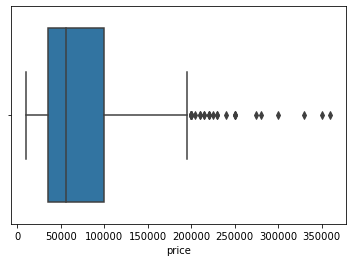

In [14]:
sns.boxplot(df["price"])

In the above graph we can conclude that cost of the bikes are avalable in the range of 30000-35000

C:\Users\asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='kilometers'>

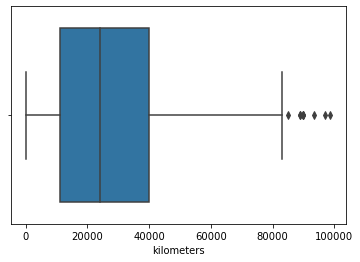

In [15]:
sns.boxplot(df["kilometers"])

In the above graph we can conclude that most of the bikes are driven below 40000 are more

# bivariant 1  

<Figure size 1080x504 with 0 Axes>

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 [Text(0, 0, 'Bajaj'),
  Text(1, 0, 'Suzuki'),
  Text(2, 0, 'Yamaha'),
  Text(3, 0, 'Hero'),
  Text(4, 0, 'Honda'),
  Text(5, 0, 'Vespa'),
  Text(6, 0, 'Royal'),
  Text(7, 0, 'TVS'),
  Text(8, 0, 'Jawa'),
  Text(9, 0, 'KTM'),
  Text(10, 0, 'Hyosung'),
  Text(11, 0, 'BMW'),
  Text(12, 0, 'Aprilia'),
  Text(13, 0, 'Benelli'),
  Text(14, 0, 'Kawasaki'),
  Text(15, 0, 'UM'),
  Text(16, 0, 'Husqvarna'),
  Text(17, 0, 'Mahindra')])

<Figure size 1080x504 with 0 Axes>

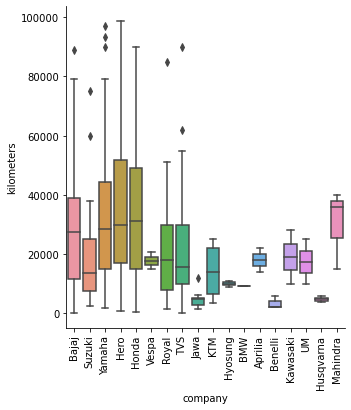

In [69]:
plt.figure(figsize=(15,7))
sns.catplot(x='company', y='kilometers', data=df, kind='box')  
plt.xticks(rotation = 90)
plt.show()

in the above graph we conclude that kilometers driven of different company bikes is different for other companies,Yamaha has the highest kilometers driven bikes from all the companies

# univariant 2

# disturbution plot

C:\Users\asus\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


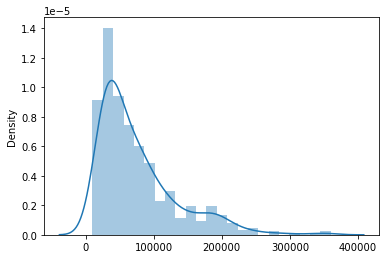

In [6]:
#plt.figure(figsize=(15,7))
sns.distplot(x = df.price,);

In the above graph we can conclude that cost of the more bikes are avalable in the range of 30000-35000

<AxesSubplot:xlabel='price', ylabel='kilometers'>

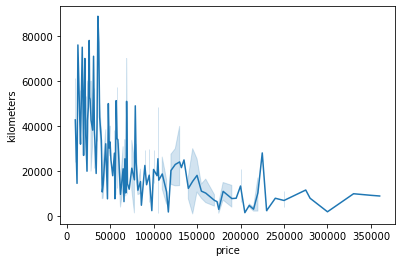

In [18]:
#plt.figure(figsize=(15,7))
sns.lineplot(x = "price", y = "kilometers",data = df)

# univariant 3

# count plot

<AxesSubplot:xlabel='model_year', ylabel='count'>

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22]),
 [Text(0, 0, '1987'),
  Text(1, 0, '1988'),
  Text(2, 0, '2001'),
  Text(3, 0, '2002'),
  Text(4, 0, '2003'),
  Text(5, 0, '2004'),
  Text(6, 0, '2005'),
  Text(7, 0, '2006'),
  Text(8, 0, '2007'),
  Text(9, 0, '2008'),
  Text(10, 0, '2009'),
  Text(11, 0, '2010'),
  Text(12, 0, '2011'),
  Text(13, 0, '2012'),
  Text(14, 0, '2013'),
  Text(15, 0, '2014'),
  Text(16, 0, '2015'),
  Text(17, 0, '2016'),
  Text(18, 0, '2017'),
  Text(19, 0, '2018'),
  Text(20, 0, '2019'),
  Text(21, 0, '2020'),
  Text(22, 0, '2021')])

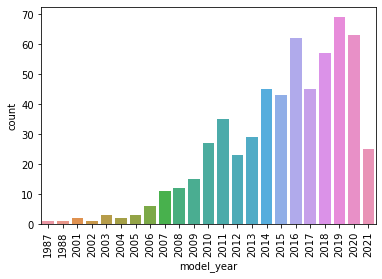

In [9]:
#plt.figure(figsize=(15,7))
sns.countplot(x= "model_year",data=df)
plt.xticks(rotation = 90)
plt.show()

In the above graph we conclude that honda company has more bikes in sale compared to other companies

# univariant 4

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 [Text(0, 0, 'Bajaj'),
  Text(1, 0, 'Suzuki'),
  Text(2, 0, 'Yamaha'),
  Text(3, 0, 'Hero'),
  Text(4, 0, 'Honda'),
  Text(5, 0, 'Vespa'),
  Text(6, 0, 'Royal'),
  Text(7, 0, 'TVS'),
  Text(8, 0, 'Jawa'),
  Text(9, 0, 'KTM'),
  Text(10, 0, 'Hyosung'),
  Text(11, 0, 'BMW'),
  Text(12, 0, 'Aprilia'),
  Text(13, 0, 'Benelli'),
  Text(14, 0, 'Kawasaki'),
  Text(15, 0, 'UM'),
  Text(16, 0, 'Husqvarna'),
  Text(17, 0, 'Mahindra')])

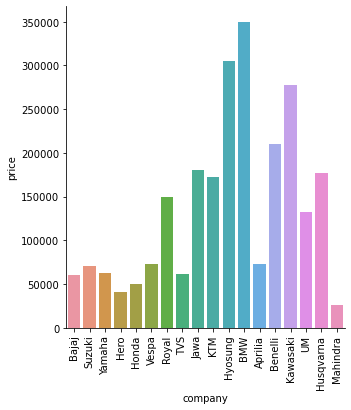

In [29]:
sns.catplot(x='company',
            y='price',
            data=df,
            kind='bar',
            ci=None)

plt.xticks(rotation = 90)
plt.show()

C:\Users\asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='price', ylabel='model_year'>

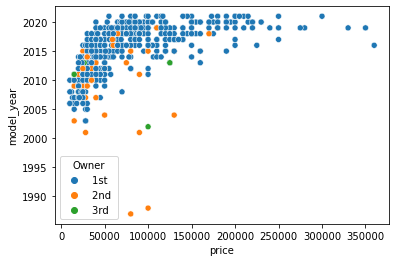

In [30]:
#plt.figure(figsize=(15,7))
sns.scatterplot(df["price"],df["model_year"],hue=df["Owner"])

# bivariant 3

# catplot

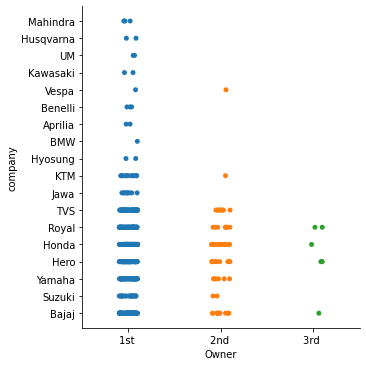

In [33]:
sns.catplot(x="Owner", y="company", data=df)

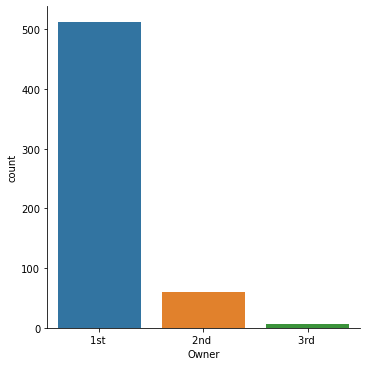

In [35]:
sns.catplot(x='Owner', data=df, kind='count')

<AxesSubplot:xlabel='model_year', ylabel='price'>

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22]),
 [Text(0, 0, '1987'),
  Text(1, 0, '1988'),
  Text(2, 0, '2001'),
  Text(3, 0, '2002'),
  Text(4, 0, '2003'),
  Text(5, 0, '2004'),
  Text(6, 0, '2005'),
  Text(7, 0, '2006'),
  Text(8, 0, '2007'),
  Text(9, 0, '2008'),
  Text(10, 0, '2009'),
  Text(11, 0, '2010'),
  Text(12, 0, '2011'),
  Text(13, 0, '2012'),
  Text(14, 0, '2013'),
  Text(15, 0, '2014'),
  Text(16, 0, '2015'),
  Text(17, 0, '2016'),
  Text(18, 0, '2017'),
  Text(19, 0, '2018'),
  Text(20, 0, '2019'),
  Text(21, 0, '2020'),
  Text(22, 0, '2021')])

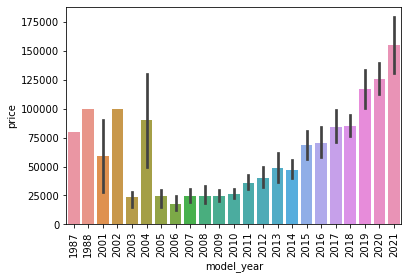

In [28]:
sns.barplot(x="model_year", y="price", data=df)
plt.xticks(rotation = 90)
plt.show()

In [42]:
min_value = df['price'].min()
max_value = df['price'].max()
print(min_value)
print(max_value)

10000
360000


In [43]:
bins = np.linspace(min_value,max_value,4)
bins

array([ 10000.        , 126666.66666667, 243333.33333333, 360000.        ])

In [48]:
labels = ['5000-30000','30000-80000','80000-above']

In [49]:
df['bins'] = pd.cut(df['price'],bins=bins,labels=labels,include_lowest=True)

In [50]:
df['bins']

0       5000-30000
1       5000-30000
2       5000-30000
3       5000-30000
4       5000-30000
          ...     
575     5000-30000
576     5000-30000
577     5000-30000
578     5000-30000
579    30000-80000
Name: bins, Length: 580, dtype: category
Categories (3, object): ['5000-30000' < '30000-80000' < '80000-above']

(array([488.,   0.,   9.,   0.,  83.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. ]),
 <BarContainer object of 5 artists>)

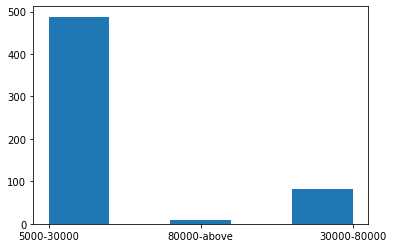

In [51]:
plt.hist(df['bins'],bins=5)
plt.show()

In the above histogram we can see that the avalablility of bikes in the price range between 5000-43333 are more

In [52]:
df['bins']

0       5000-30000
1       5000-30000
2       5000-30000
3       5000-30000
4       5000-30000
          ...     
575     5000-30000
576     5000-30000
577     5000-30000
578     5000-30000
579    30000-80000
Name: bins, Length: 580, dtype: category
Categories (3, object): ['5000-30000' < '30000-80000' < '80000-above']

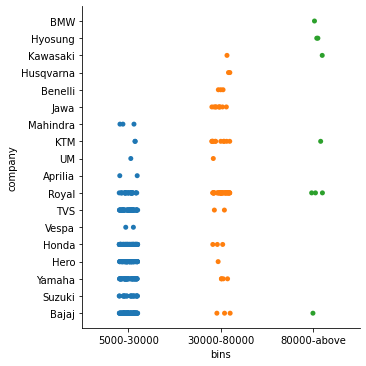

In [53]:
sns.catplot(x="bins", y="company", data=df)

In the above histogram we can see that the cost of Royal Enfield and bajaj is above 81666

In [54]:
df[['price','kilometers','model_year']].corr()

,price,kilometers,model_year
price,1.000000,-0.480773,0.524465
kilometers,-0.480773,1.000000,-0.539444
model_year,0.524465,-0.539444,1.000000


# multivariant 1

<AxesSubplot:>

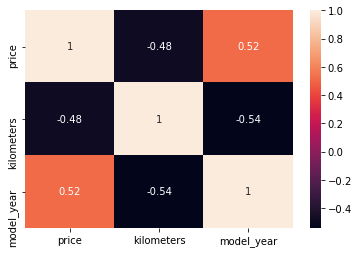

In [32]:
#plt.figure(figsize=(15,7))
sns.heatmap(df[['price','kilometers','model_year']].corr(), annot=True)
plt.show()

C:\Users\asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='company', ylabel='kilometers'>

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

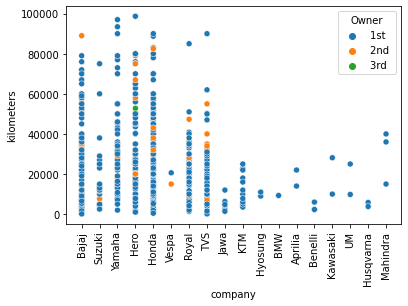

In [38]:
sns.scatterplot(df["company"],df["kilometers"],hue=df["Owner"])
plt.xticks(rotation = 90)
plt.show()

# problem statement graphs

In [20]:
crosstab=pd.crosstab(df['company'],df['price']<30000)
crosstab

price,False,True
company,,
Aprilia,2,0
BMW,1,0
Bajaj,84,22
Benelli,3,0
Hero,54,29
Honda,105,23
Husqvarna,2,0
Hyosung,2,0
Jawa,9,0


<Figure size 1080x504 with 0 Axes>

<AxesSubplot:xlabel='company'>

<Figure size 1080x504 with 0 Axes>

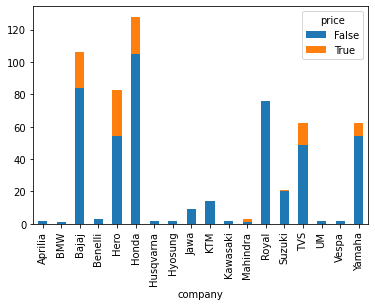

In [21]:
plt.figure(figsize=(15,7))
crosstab.plot(kind='bar',stacked=True)

In [22]:
crosstab1=pd.crosstab(df['Bikenames'],df['price']<45000)
crosstab1

price,False,True
Bikenames,,
200 Duke BS,1,0
200 Duke Standard,1,0
250 Duke ABS,2,0
250 Duke BS,1,0
390 Duke ABS,1,0
...,...,...
Xtreme Sports Front,0,1
Xtreme Sports Rear,1,0
YZF R15 2011-2018,7,0


In [71]:
df_1 = df[df['price']<45000]

C:\Users\asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Bikenames', ylabel='count'>

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Activa 2000-2015 Standard'),
  Text(1, 0, 'Pulsar 150 Standard'),
  Text(2, 0, 'Apache RTR 160'),
  Text(3, 0, 'FZ16 Standard'),
  Text(4, 0, 'Pulsar 135 LS'),
  Text(5, 0, 'Activa 2000-2015 Deluxe'),
  Text(6, 0, 'Pulsar 180 2001-2019'),
  Text(7, 0, 'Honda CD Deluxe'),
  Text(8, 0, 'Honda Hunk Standard'),
  Text(9, 0, 'FZ S 2012-2016')])

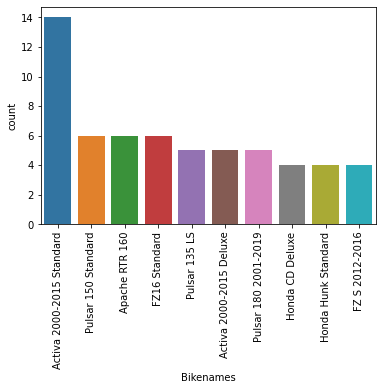

In [76]:
#plt.figure(figsize=(15,7))
sns.countplot(df_1["Bikenames"], order=df_1["Bikenames"].value_counts().iloc[:10].index)
plt.xticks(rotation = 90)
plt.show()